**Data Exploration**

In [73]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import os, random, cv2


TRAIN_DIR = 'C:/Users/vk3567/Desktop/Capstone Final/data/train/'
TEST_DIR = 'C:/Users/vk3567/Desktop/Capstone Final/data/test/'

# load the full dataset
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] 
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]
# load the full test set
test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]
test_save = test_images
# print the number of images loaded for both training and testing
print('train_images.shape | {0}'.format(len(train_images)))
print('test_images.shape   | {0}'.format(len(test_images)))
print('train_dogs.shape | {0}'.format(len(train_dogs)))
print('train_cats.shape   | {0}'.format(len(train_cats)))

train_images.shape | 25000
test_images.shape   | 12500
train_dogs.shape | 12500
train_cats.shape   | 12500


In [81]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
CHANNELS = 3
train_target = []
test_images = test_images
# slice datasets for memory efficiency on Kaggle Kernels, delete if using full dataset
train_images = train_dogs+ train_cats
train_targets = np.append(np.ones(12500), np.zeros(12500))

#random.shuffle(train_images)
#train_images, train_targets = shuffle(train_images, train_targets, random_state=0)

# split the dataset into training and testing
train_images, valid_images, train_targets, valid_targets = train_test_split(train_images, train_targets, test_size=0.20, random_state=10)

print("Train shape: {}".format(len(train_images)))
print("Train target shape: {}".format(len(train_targets)))
print("valid shape: {}".format(len(valid_images)))
print("valid target shape: {}".format(len(valid_targets)))
print("Test shape: {}".format(len(test_images)))

Train shape: 20000
Train target shape: 20000
valid shape: 5000
valid target shape: 5000
Test shape: 12500


In [60]:
len(test_images)

12500

In [95]:
train_targets.shape

(20000,)

In [96]:
test_images.shape

AttributeError: 'list' object has no attribute 'shape'

**Data Pre-processing**

In [4]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

C:\Users\vk3567\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 
# pre-process the data for Keras
train_images = paths_to_tensor(train_images).astype('float32')/255
valid_images = paths_to_tensor(valid_images).astype('float32')/255
test_images = paths_to_tensor(test_images).astype('float32')/255

100%|████████████████████████████████████| 12500/12500 [02:12<00:00, 94.39it/s]


In [91]:
test_images[1]

'C:/Users/vk3567/Desktop/Capstone Final/data/test/10.jpg'

**Benchmark Implementation**

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import plot_model

model = Sequential()

### TODO: Define your architecture.
# First Convolutional Layer
model.add(Conv2D(16, kernel_size=(2, 2), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

# Fully connected layer
model.add(Dense(2, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 223, 223, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 197136)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394274    
Total params: 394,482
Trainable params: 394,482
Non-trainable params: 0
_________________________________________________________________


In [8]:
# compile the benchmark architecture
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train the Benchmark

from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 5

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.benchmark_from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

history_cnn = model.fit(train_images, train_targets, 
          validation_data=(valid_images, valid_targets),
          epochs=epochs, batch_size=50, callbacks=[checkpointer], verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5


10150/20000 [==============>...............] - ETA: 31:19 - loss: 0.3803 - acc: 0.82 - ETA: 28:33 - loss: 0.3526 - acc: 0.86 - ETA: 26:23 - loss: 0.3385 - acc: 0.84 - ETA: 25:41 - loss: 0.3123 - acc: 0.86 - ETA: 26:00 - loss: 0.3166 - acc: 0.86 - ETA: 25:41 - loss: 0.2959 - acc: 0.88 - ETA: 25:45 - loss: 0.3079 - acc: 0.86 - ETA: 25:21 - loss: 0.2925 - acc: 0.87 - ETA: 25:35 - loss: 0.3132 - acc: 0.86 - ETA: 25:46 - loss: 0.3157 - acc: 0.86 - ETA: 25:47 - loss: 0.3108 - acc: 0.86 - ETA: 25:56 - loss: 0.3059 - acc: 0.86 - ETA: 26:12 - loss: 0.3085 - acc: 0.86 - ETA: 26:31 - loss: 0.3090 - acc: 0.86 - ETA: 26:14 - loss: 0.3130 - acc: 0.85 - ETA: 26:00 - loss: 0.3132 - acc: 0.85 - ETA: 25:40 - loss: 0.3103 - acc: 0.85 - ETA: 25:25 - loss: 0.3140 - acc: 0.85 - ETA: 25:21 - loss: 0.3174 - acc: 0.85 - ETA: 25:11 - loss: 0.3178 - acc: 0.85 - ETA: 25:07 - loss: 0.3158 - acc: 0.85 - ETA: 25:06 - loss: 0.3182 - acc: 0.85 - ETA: 24:58 - loss: 0.3142 - acc: 0.85 - ETA: 24:51 - loss: 0.3190 - acc: 

20000/20000 [==============================] - ETA: 12:12 - loss: 0.3171 - acc: 0.86 - ETA: 12:08 - loss: 0.3169 - acc: 0.86 - ETA: 12:04 - loss: 0.3164 - acc: 0.86 - ETA: 12:00 - loss: 0.3161 - acc: 0.86 - ETA: 11:56 - loss: 0.3162 - acc: 0.86 - ETA: 11:53 - loss: 0.3160 - acc: 0.86 - ETA: 11:49 - loss: 0.3164 - acc: 0.86 - ETA: 11:45 - loss: 0.3165 - acc: 0.86 - ETA: 11:41 - loss: 0.3164 - acc: 0.86 - ETA: 11:38 - loss: 0.3164 - acc: 0.86 - ETA: 11:34 - loss: 0.3162 - acc: 0.86 - ETA: 11:31 - loss: 0.3158 - acc: 0.86 - ETA: 11:28 - loss: 0.3159 - acc: 0.86 - ETA: 11:25 - loss: 0.3160 - acc: 0.86 - ETA: 11:22 - loss: 0.3160 - acc: 0.86 - ETA: 11:18 - loss: 0.3158 - acc: 0.86 - ETA: 11:15 - loss: 0.3154 - acc: 0.86 - ETA: 11:13 - loss: 0.3156 - acc: 0.86 - ETA: 11:10 - loss: 0.3154 - acc: 0.86 - ETA: 11:06 - loss: 0.3151 - acc: 0.86 - ETA: 11:03 - loss: 0.3154 - acc: 0.86 - ETA: 10:59 - loss: 0.3158 - acc: 0.86 - ETA: 10:56 - loss: 0.3153 - acc: 0.86 - ETA: 10:52 - loss: 0.3156 - acc: 

10200/20000 [==============>...............] - ETA: 40:58 - loss: 0.1908 - acc: 0.94 - ETA: 32:35 - loss: 0.2376 - acc: 0.92 - ETA: 30:31 - loss: 0.2433 - acc: 0.90 - ETA: 29:14 - loss: 0.3003 - acc: 0.87 - ETA: 28:40 - loss: 0.2979 - acc: 0.86 - ETA: 28:11 - loss: 0.2993 - acc: 0.87 - ETA: 27:30 - loss: 0.3049 - acc: 0.86 - ETA: 26:52 - loss: 0.2970 - acc: 0.86 - ETA: 26:30 - loss: 0.3035 - acc: 0.85 - ETA: 26:20 - loss: 0.3042 - acc: 0.86 - ETA: 26:13 - loss: 0.3028 - acc: 0.86 - ETA: 25:49 - loss: 0.3025 - acc: 0.86 - ETA: 25:34 - loss: 0.2977 - acc: 0.86 - ETA: 25:18 - loss: 0.2980 - acc: 0.86 - ETA: 25:14 - loss: 0.2995 - acc: 0.86 - ETA: 25:15 - loss: 0.3040 - acc: 0.86 - ETA: 25:18 - loss: 0.3035 - acc: 0.86 - ETA: 25:18 - loss: 0.2986 - acc: 0.86 - ETA: 25:22 - loss: 0.2941 - acc: 0.87 - ETA: 25:21 - loss: 0.2933 - acc: 0.87 - ETA: 25:19 - loss: 0.2967 - acc: 0.86 - ETA: 25:07 - loss: 0.2953 - acc: 0.87 - ETA: 24:57 - loss: 0.2937 - acc: 0.87 - ETA: 24:50 - loss: 0.2900 - acc: 

20000/20000 [==============================] - ETA: 11:59 - loss: 0.2904 - acc: 0.87 - ETA: 11:56 - loss: 0.2906 - acc: 0.87 - ETA: 11:52 - loss: 0.2901 - acc: 0.87 - ETA: 11:48 - loss: 0.2903 - acc: 0.87 - ETA: 11:44 - loss: 0.2900 - acc: 0.87 - ETA: 11:41 - loss: 0.2897 - acc: 0.87 - ETA: 11:37 - loss: 0.2895 - acc: 0.87 - ETA: 11:34 - loss: 0.2889 - acc: 0.87 - ETA: 11:29 - loss: 0.2888 - acc: 0.87 - ETA: 11:25 - loss: 0.2884 - acc: 0.87 - ETA: 11:21 - loss: 0.2880 - acc: 0.87 - ETA: 11:18 - loss: 0.2878 - acc: 0.87 - ETA: 11:14 - loss: 0.2876 - acc: 0.87 - ETA: 11:10 - loss: 0.2877 - acc: 0.87 - ETA: 11:06 - loss: 0.2877 - acc: 0.87 - ETA: 11:02 - loss: 0.2876 - acc: 0.87 - ETA: 10:58 - loss: 0.2871 - acc: 0.88 - ETA: 10:54 - loss: 0.2865 - acc: 0.88 - ETA: 10:50 - loss: 0.2866 - acc: 0.88 - ETA: 10:47 - loss: 0.2868 - acc: 0.88 - ETA: 10:43 - loss: 0.2879 - acc: 0.88 - ETA: 10:39 - loss: 0.2878 - acc: 0.88 - ETA: 10:35 - loss: 0.2876 - acc: 0.88 - ETA: 10:31 - loss: 0.2875 - acc: 

10200/20000 [==============>...............] - ETA: 36:49 - loss: 0.4480 - acc: 0.72 - ETA: 29:41 - loss: 0.3647 - acc: 0.81 - ETA: 27:01 - loss: 0.3089 - acc: 0.84 - ETA: 26:23 - loss: 0.3026 - acc: 0.85 - ETA: 24:49 - loss: 0.2867 - acc: 0.86 - ETA: 24:27 - loss: 0.2813 - acc: 0.87 - ETA: 24:08 - loss: 0.2720 - acc: 0.87 - ETA: 23:52 - loss: 0.2749 - acc: 0.87 - ETA: 24:13 - loss: 0.2718 - acc: 0.88 - ETA: 24:04 - loss: 0.2656 - acc: 0.88 - ETA: 24:02 - loss: 0.2722 - acc: 0.88 - ETA: 24:01 - loss: 0.2672 - acc: 0.88 - ETA: 23:56 - loss: 0.2617 - acc: 0.88 - ETA: 23:54 - loss: 0.2555 - acc: 0.89 - ETA: 24:03 - loss: 0.2610 - acc: 0.88 - ETA: 24:05 - loss: 0.2563 - acc: 0.89 - ETA: 24:11 - loss: 0.2571 - acc: 0.89 - ETA: 24:09 - loss: 0.2564 - acc: 0.89 - ETA: 24:14 - loss: 0.2575 - acc: 0.89 - ETA: 24:11 - loss: 0.2566 - acc: 0.89 - ETA: 24:15 - loss: 0.2561 - acc: 0.89 - ETA: 24:15 - loss: 0.2564 - acc: 0.89 - ETA: 24:02 - loss: 0.2537 - acc: 0.89 - ETA: 23:55 - loss: 0.2497 - acc: 

20000/20000 [==============================] - ETA: 12:08 - loss: 0.2553 - acc: 0.89 - ETA: 12:04 - loss: 0.2549 - acc: 0.89 - ETA: 12:01 - loss: 0.2550 - acc: 0.89 - ETA: 11:58 - loss: 0.2548 - acc: 0.89 - ETA: 11:55 - loss: 0.2553 - acc: 0.89 - ETA: 11:52 - loss: 0.2550 - acc: 0.89 - ETA: 11:48 - loss: 0.2555 - acc: 0.89 - ETA: 11:44 - loss: 0.2557 - acc: 0.89 - ETA: 11:41 - loss: 0.2555 - acc: 0.89 - ETA: 11:37 - loss: 0.2555 - acc: 0.89 - ETA: 11:33 - loss: 0.2560 - acc: 0.89 - ETA: 11:29 - loss: 0.2561 - acc: 0.89 - ETA: 11:26 - loss: 0.2561 - acc: 0.89 - ETA: 11:22 - loss: 0.2564 - acc: 0.89 - ETA: 11:18 - loss: 0.2561 - acc: 0.89 - ETA: 11:15 - loss: 0.2556 - acc: 0.89 - ETA: 11:11 - loss: 0.2555 - acc: 0.89 - ETA: 11:08 - loss: 0.2557 - acc: 0.89 - ETA: 11:05 - loss: 0.2557 - acc: 0.89 - ETA: 11:02 - loss: 0.2561 - acc: 0.89 - ETA: 10:58 - loss: 0.2559 - acc: 0.89 - ETA: 10:55 - loss: 0.2557 - acc: 0.89 - ETA: 10:51 - loss: 0.2553 - acc: 0.89 - ETA: 10:47 - loss: 0.2556 - acc: 

10200/20000 [==============>...............] - ETA: 36:12 - loss: 0.1921 - acc: 0.92 - ETA: 30:16 - loss: 0.1909 - acc: 0.93 - ETA: 27:52 - loss: 0.1888 - acc: 0.93 - ETA: 26:16 - loss: 0.2335 - acc: 0.90 - ETA: 25:24 - loss: 0.2598 - acc: 0.89 - ETA: 24:31 - loss: 0.2604 - acc: 0.89 - ETA: 23:47 - loss: 0.2535 - acc: 0.89 - ETA: 23:20 - loss: 0.2728 - acc: 0.89 - ETA: 24:00 - loss: 0.2654 - acc: 0.89 - ETA: 23:53 - loss: 0.2639 - acc: 0.88 - ETA: 23:39 - loss: 0.2671 - acc: 0.87 - ETA: 23:42 - loss: 0.2639 - acc: 0.88 - ETA: 23:24 - loss: 0.2651 - acc: 0.88 - ETA: 23:06 - loss: 0.2621 - acc: 0.88 - ETA: 23:03 - loss: 0.2684 - acc: 0.87 - ETA: 22:49 - loss: 0.2690 - acc: 0.87 - ETA: 22:38 - loss: 0.2690 - acc: 0.88 - ETA: 22:32 - loss: 0.2713 - acc: 0.87 - ETA: 22:25 - loss: 0.2689 - acc: 0.88 - ETA: 22:24 - loss: 0.2671 - acc: 0.88 - ETA: 22:19 - loss: 0.2630 - acc: 0.88 - ETA: 22:08 - loss: 0.2609 - acc: 0.88 - ETA: 22:09 - loss: 0.2564 - acc: 0.88 - ETA: 22:07 - loss: 0.2508 - acc: 

20000/20000 [==============================] - ETA: 11:57 - loss: 0.2277 - acc: 0.90 - ETA: 11:53 - loss: 0.2279 - acc: 0.90 - ETA: 11:49 - loss: 0.2283 - acc: 0.90 - ETA: 11:46 - loss: 0.2282 - acc: 0.90 - ETA: 11:42 - loss: 0.2281 - acc: 0.90 - ETA: 11:38 - loss: 0.2278 - acc: 0.90 - ETA: 11:34 - loss: 0.2281 - acc: 0.90 - ETA: 11:31 - loss: 0.2277 - acc: 0.90 - ETA: 11:27 - loss: 0.2275 - acc: 0.90 - ETA: 11:23 - loss: 0.2275 - acc: 0.90 - ETA: 11:19 - loss: 0.2276 - acc: 0.90 - ETA: 11:15 - loss: 0.2279 - acc: 0.90 - ETA: 11:12 - loss: 0.2277 - acc: 0.90 - ETA: 11:08 - loss: 0.2281 - acc: 0.90 - ETA: 11:04 - loss: 0.2288 - acc: 0.90 - ETA: 11:00 - loss: 0.2292 - acc: 0.90 - ETA: 10:57 - loss: 0.2295 - acc: 0.90 - ETA: 10:54 - loss: 0.2290 - acc: 0.90 - ETA: 10:49 - loss: 0.2292 - acc: 0.90 - ETA: 10:46 - loss: 0.2296 - acc: 0.90 - ETA: 10:42 - loss: 0.2304 - acc: 0.90 - ETA: 10:39 - loss: 0.2309 - acc: 0.90 - ETA: 10:35 - loss: 0.2306 - acc: 0.90 - ETA: 10:32 - loss: 0.2303 - acc: 

10200/20000 [==============>...............] - ETA: 26:58 - loss: 0.3106 - acc: 0.80 - ETA: 24:09 - loss: 0.3296 - acc: 0.82 - ETA: 24:05 - loss: 0.2704 - acc: 0.86 - ETA: 23:14 - loss: 0.2482 - acc: 0.88 - ETA: 23:50 - loss: 0.2593 - acc: 0.87 - ETA: 23:48 - loss: 0.2465 - acc: 0.89 - ETA: 23:56 - loss: 0.2491 - acc: 0.88 - ETA: 23:54 - loss: 0.2635 - acc: 0.87 - ETA: 23:56 - loss: 0.2643 - acc: 0.87 - ETA: 24:03 - loss: 0.2597 - acc: 0.87 - ETA: 23:43 - loss: 0.2503 - acc: 0.88 - ETA: 23:24 - loss: 0.2488 - acc: 0.88 - ETA: 23:14 - loss: 0.2392 - acc: 0.89 - ETA: 23:02 - loss: 0.2462 - acc: 0.88 - ETA: 22:59 - loss: 0.2475 - acc: 0.88 - ETA: 22:46 - loss: 0.2498 - acc: 0.88 - ETA: 22:45 - loss: 0.2459 - acc: 0.89 - ETA: 22:43 - loss: 0.2431 - acc: 0.89 - ETA: 22:38 - loss: 0.2382 - acc: 0.89 - ETA: 22:29 - loss: 0.2337 - acc: 0.89 - ETA: 22:23 - loss: 0.2298 - acc: 0.90 - ETA: 22:22 - loss: 0.2329 - acc: 0.89 - ETA: 22:15 - loss: 0.2317 - acc: 0.89 - ETA: 22:14 - loss: 0.2315 - acc: 

20000/20000 [==============================] - ETA: 11:28 - loss: 0.2198 - acc: 0.90 - ETA: 11:24 - loss: 0.2198 - acc: 0.90 - ETA: 11:20 - loss: 0.2194 - acc: 0.90 - ETA: 11:16 - loss: 0.2193 - acc: 0.90 - ETA: 11:13 - loss: 0.2194 - acc: 0.90 - ETA: 11:09 - loss: 0.2196 - acc: 0.90 - ETA: 11:06 - loss: 0.2194 - acc: 0.90 - ETA: 11:03 - loss: 0.2194 - acc: 0.90 - ETA: 10:59 - loss: 0.2192 - acc: 0.90 - ETA: 10:56 - loss: 0.2193 - acc: 0.90 - ETA: 10:52 - loss: 0.2195 - acc: 0.90 - ETA: 10:48 - loss: 0.2194 - acc: 0.90 - ETA: 10:45 - loss: 0.2193 - acc: 0.90 - ETA: 10:41 - loss: 0.2189 - acc: 0.90 - ETA: 10:38 - loss: 0.2186 - acc: 0.90 - ETA: 10:34 - loss: 0.2184 - acc: 0.90 - ETA: 10:31 - loss: 0.2182 - acc: 0.90 - ETA: 10:27 - loss: 0.2182 - acc: 0.90 - ETA: 10:23 - loss: 0.2179 - acc: 0.90 - ETA: 10:20 - loss: 0.2179 - acc: 0.90 - ETA: 10:16 - loss: 0.2181 - acc: 0.90 - ETA: 10:13 - loss: 0.2177 - acc: 0.90 - ETA: 10:10 - loss: 0.2185 - acc: 0.90 - ETA: 10:07 - loss: 0.2182 - acc: 

**(IMPLEMENTATION) Model Architecture**

In [13]:
model = Sequential()

### TODO: Define your architecture.
# First Convolutional Layer
model.add(Conv2D(16, kernel_size=(2, 2), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 2nd Convolutional Layer
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3rd Convolutional Layer
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# Global average pooling layer
#model.add(GlobalAveragePooling2D())  
# Fully connected layer
model.add(Dense(2, activation='softmax'))

model.summary()
#plot_model(model, to_file='model.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 223, 223, 16)      208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 110, 110, 32)      2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 54, 54, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 64)        16448     
__________

**Compile the Model**

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**(IMPLEMENTATION) Train the Model**

In [15]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 5

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_new_scratch.hdf5', 
                               verbose=1, save_best_only=True)

history_cnn = model.fit(train_images, train_targets, 
          validation_data=(valid_images, valid_targets),
          epochs=epochs, batch_size=50, callbacks=[checkpointer], verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5


10150/20000 [==============>...............] - ETA: 37:14 - loss: 0.6889 - acc: 0.52 - ETA: 32:04 - loss: 0.6914 - acc: 0.52 - ETA: 30:04 - loss: 0.6993 - acc: 0.51 - ETA: 28:38 - loss: 0.6972 - acc: 0.51 - ETA: 28:12 - loss: 0.6973 - acc: 0.51 - ETA: 27:20 - loss: 0.7010 - acc: 0.50 - ETA: 27:37 - loss: 0.6981 - acc: 0.52 - ETA: 27:24 - loss: 0.6972 - acc: 0.52 - ETA: 26:55 - loss: 0.6962 - acc: 0.53 - ETA: 26:33 - loss: 0.6948 - acc: 0.53 - ETA: 26:04 - loss: 0.6938 - acc: 0.53 - ETA: 26:08 - loss: 0.6938 - acc: 0.52 - ETA: 25:49 - loss: 0.6937 - acc: 0.52 - ETA: 25:23 - loss: 0.6926 - acc: 0.53 - ETA: 25:08 - loss: 0.6913 - acc: 0.53 - ETA: 24:56 - loss: 0.6909 - acc: 0.53 - ETA: 24:49 - loss: 0.6916 - acc: 0.52 - ETA: 24:40 - loss: 0.6916 - acc: 0.52 - ETA: 24:52 - loss: 0.6908 - acc: 0.52 - ETA: 24:48 - loss: 0.6893 - acc: 0.53 - ETA: 24:42 - loss: 0.6890 - acc: 0.53 - ETA: 24:48 - loss: 0.6882 - acc: 0.54 - ETA: 24:50 - loss: 0.6875 - acc: 0.54 - ETA: 24:42 - loss: 0.6866 - acc: 

20000/20000 [==============================] - ETA: 12:22 - loss: 0.6270 - acc: 0.63 - ETA: 12:18 - loss: 0.6268 - acc: 0.63 - ETA: 12:14 - loss: 0.6268 - acc: 0.63 - ETA: 12:10 - loss: 0.6267 - acc: 0.63 - ETA: 12:06 - loss: 0.6263 - acc: 0.63 - ETA: 12:02 - loss: 0.6266 - acc: 0.63 - ETA: 11:59 - loss: 0.6264 - acc: 0.63 - ETA: 11:55 - loss: 0.6261 - acc: 0.63 - ETA: 11:51 - loss: 0.6265 - acc: 0.63 - ETA: 11:48 - loss: 0.6264 - acc: 0.63 - ETA: 11:44 - loss: 0.6261 - acc: 0.63 - ETA: 11:41 - loss: 0.6255 - acc: 0.63 - ETA: 11:37 - loss: 0.6249 - acc: 0.63 - ETA: 11:33 - loss: 0.6244 - acc: 0.64 - ETA: 11:30 - loss: 0.6243 - acc: 0.64 - ETA: 11:26 - loss: 0.6237 - acc: 0.64 - ETA: 11:22 - loss: 0.6242 - acc: 0.64 - ETA: 11:18 - loss: 0.6247 - acc: 0.64 - ETA: 11:15 - loss: 0.6246 - acc: 0.64 - ETA: 11:11 - loss: 0.6241 - acc: 0.64 - ETA: 11:07 - loss: 0.6247 - acc: 0.64 - ETA: 11:04 - loss: 0.6251 - acc: 0.64 - ETA: 11:00 - loss: 0.6245 - acc: 0.64 - ETA: 10:56 - loss: 0.6241 - acc: 

10200/20000 [==============>...............] - ETA: 35:53 - loss: 0.4485 - acc: 0.82 - ETA: 30:56 - loss: 0.4748 - acc: 0.80 - ETA: 28:14 - loss: 0.5050 - acc: 0.77 - ETA: 28:04 - loss: 0.4879 - acc: 0.79 - ETA: 26:58 - loss: 0.4778 - acc: 0.80 - ETA: 26:52 - loss: 0.4936 - acc: 0.79 - ETA: 26:14 - loss: 0.5029 - acc: 0.78 - ETA: 26:46 - loss: 0.5046 - acc: 0.78 - ETA: 26:40 - loss: 0.5066 - acc: 0.77 - ETA: 26:46 - loss: 0.5055 - acc: 0.77 - ETA: 26:13 - loss: 0.5061 - acc: 0.77 - ETA: 26:07 - loss: 0.5032 - acc: 0.77 - ETA: 26:04 - loss: 0.5162 - acc: 0.76 - ETA: 25:54 - loss: 0.5187 - acc: 0.76 - ETA: 25:49 - loss: 0.5161 - acc: 0.77 - ETA: 25:27 - loss: 0.5113 - acc: 0.77 - ETA: 25:25 - loss: 0.5066 - acc: 0.77 - ETA: 25:17 - loss: 0.5056 - acc: 0.77 - ETA: 25:10 - loss: 0.5082 - acc: 0.77 - ETA: 25:17 - loss: 0.5114 - acc: 0.77 - ETA: 25:22 - loss: 0.5064 - acc: 0.77 - ETA: 25:08 - loss: 0.5112 - acc: 0.76 - ETA: 25:01 - loss: 0.5176 - acc: 0.76 - ETA: 24:59 - loss: 0.5183 - acc: 

20000/20000 [==============================] - ETA: 12:24 - loss: 0.5091 - acc: 0.75 - ETA: 12:20 - loss: 0.5088 - acc: 0.75 - ETA: 12:16 - loss: 0.5086 - acc: 0.75 - ETA: 12:13 - loss: 0.5086 - acc: 0.75 - ETA: 12:09 - loss: 0.5087 - acc: 0.75 - ETA: 12:05 - loss: 0.5090 - acc: 0.75 - ETA: 12:02 - loss: 0.5088 - acc: 0.75 - ETA: 11:58 - loss: 0.5090 - acc: 0.75 - ETA: 11:54 - loss: 0.5086 - acc: 0.75 - ETA: 11:50 - loss: 0.5084 - acc: 0.75 - ETA: 11:46 - loss: 0.5080 - acc: 0.75 - ETA: 11:42 - loss: 0.5075 - acc: 0.75 - ETA: 11:39 - loss: 0.5076 - acc: 0.75 - ETA: 11:35 - loss: 0.5073 - acc: 0.75 - ETA: 11:31 - loss: 0.5070 - acc: 0.75 - ETA: 11:28 - loss: 0.5065 - acc: 0.75 - ETA: 11:24 - loss: 0.5065 - acc: 0.75 - ETA: 11:20 - loss: 0.5067 - acc: 0.75 - ETA: 11:16 - loss: 0.5070 - acc: 0.75 - ETA: 11:13 - loss: 0.5068 - acc: 0.75 - ETA: 11:09 - loss: 0.5069 - acc: 0.75 - ETA: 11:05 - loss: 0.5066 - acc: 0.75 - ETA: 11:01 - loss: 0.5062 - acc: 0.75 - ETA: 10:57 - loss: 0.5060 - acc: 

10200/20000 [==============>...............] - ETA: 33:55 - loss: 0.4095 - acc: 0.86 - ETA: 28:24 - loss: 0.3754 - acc: 0.85 - ETA: 26:37 - loss: 0.3791 - acc: 0.83 - ETA: 25:49 - loss: 0.3732 - acc: 0.85 - ETA: 25:04 - loss: 0.4038 - acc: 0.83 - ETA: 24:53 - loss: 0.4074 - acc: 0.84 - ETA: 24:58 - loss: 0.4222 - acc: 0.82 - ETA: 24:54 - loss: 0.4496 - acc: 0.80 - ETA: 24:37 - loss: 0.4550 - acc: 0.80 - ETA: 24:46 - loss: 0.4664 - acc: 0.78 - ETA: 24:26 - loss: 0.4710 - acc: 0.78 - ETA: 24:11 - loss: 0.4755 - acc: 0.77 - ETA: 24:05 - loss: 0.4631 - acc: 0.78 - ETA: 23:50 - loss: 0.4566 - acc: 0.78 - ETA: 23:36 - loss: 0.4524 - acc: 0.79 - ETA: 23:33 - loss: 0.4594 - acc: 0.78 - ETA: 23:26 - loss: 0.4637 - acc: 0.78 - ETA: 23:26 - loss: 0.4602 - acc: 0.78 - ETA: 23:17 - loss: 0.4619 - acc: 0.78 - ETA: 23:08 - loss: 0.4623 - acc: 0.78 - ETA: 23:02 - loss: 0.4567 - acc: 0.78 - ETA: 22:55 - loss: 0.4635 - acc: 0.78 - ETA: 22:47 - loss: 0.4630 - acc: 0.78 - ETA: 22:48 - loss: 0.4650 - acc: 

20000/20000 [==============================] - ETA: 11:51 - loss: 0.4490 - acc: 0.79 - ETA: 11:47 - loss: 0.4486 - acc: 0.79 - ETA: 11:44 - loss: 0.4482 - acc: 0.79 - ETA: 11:40 - loss: 0.4481 - acc: 0.79 - ETA: 11:37 - loss: 0.4479 - acc: 0.79 - ETA: 11:34 - loss: 0.4477 - acc: 0.79 - ETA: 11:30 - loss: 0.4473 - acc: 0.79 - ETA: 11:27 - loss: 0.4470 - acc: 0.79 - ETA: 11:23 - loss: 0.4461 - acc: 0.79 - ETA: 11:20 - loss: 0.4472 - acc: 0.79 - ETA: 11:17 - loss: 0.4472 - acc: 0.79 - ETA: 11:13 - loss: 0.4469 - acc: 0.79 - ETA: 11:10 - loss: 0.4465 - acc: 0.79 - ETA: 11:06 - loss: 0.4465 - acc: 0.79 - ETA: 11:02 - loss: 0.4469 - acc: 0.79 - ETA: 10:59 - loss: 0.4463 - acc: 0.79 - ETA: 10:56 - loss: 0.4457 - acc: 0.79 - ETA: 10:52 - loss: 0.4459 - acc: 0.79 - ETA: 10:49 - loss: 0.4456 - acc: 0.79 - ETA: 10:46 - loss: 0.4449 - acc: 0.79 - ETA: 10:42 - loss: 0.4452 - acc: 0.79 - ETA: 10:39 - loss: 0.4447 - acc: 0.79 - ETA: 10:35 - loss: 0.4446 - acc: 0.79 - ETA: 10:32 - loss: 0.4443 - acc: 

10200/20000 [==============>...............] - ETA: 35:16 - loss: 0.3407 - acc: 0.86 - ETA: 31:46 - loss: 0.3621 - acc: 0.84 - ETA: 28:52 - loss: 0.3910 - acc: 0.81 - ETA: 28:12 - loss: 0.3721 - acc: 0.83 - ETA: 27:17 - loss: 0.3668 - acc: 0.82 - ETA: 26:58 - loss: 0.3545 - acc: 0.84 - ETA: 26:27 - loss: 0.3593 - acc: 0.83 - ETA: 26:15 - loss: 0.3607 - acc: 0.84 - ETA: 25:35 - loss: 0.3644 - acc: 0.84 - ETA: 25:07 - loss: 0.3699 - acc: 0.83 - ETA: 24:39 - loss: 0.3869 - acc: 0.82 - ETA: 24:43 - loss: 0.3927 - acc: 0.82 - ETA: 24:31 - loss: 0.3991 - acc: 0.82 - ETA: 24:25 - loss: 0.4122 - acc: 0.81 - ETA: 24:15 - loss: 0.4147 - acc: 0.80 - ETA: 24:09 - loss: 0.4070 - acc: 0.81 - ETA: 24:16 - loss: 0.4139 - acc: 0.81 - ETA: 24:23 - loss: 0.4117 - acc: 0.81 - ETA: 24:23 - loss: 0.4064 - acc: 0.82 - ETA: 24:25 - loss: 0.4065 - acc: 0.82 - ETA: 24:19 - loss: 0.4033 - acc: 0.82 - ETA: 24:13 - loss: 0.4005 - acc: 0.82 - ETA: 24:08 - loss: 0.4077 - acc: 0.82 - ETA: 24:16 - loss: 0.4089 - acc: 

20000/20000 [==============================] - ETA: 12:10 - loss: 0.4108 - acc: 0.81 - ETA: 12:06 - loss: 0.4114 - acc: 0.81 - ETA: 12:03 - loss: 0.4117 - acc: 0.81 - ETA: 11:59 - loss: 0.4117 - acc: 0.81 - ETA: 11:55 - loss: 0.4116 - acc: 0.81 - ETA: 11:51 - loss: 0.4117 - acc: 0.81 - ETA: 11:47 - loss: 0.4116 - acc: 0.81 - ETA: 11:43 - loss: 0.4118 - acc: 0.81 - ETA: 11:39 - loss: 0.4121 - acc: 0.81 - ETA: 11:35 - loss: 0.4117 - acc: 0.81 - ETA: 11:31 - loss: 0.4117 - acc: 0.81 - ETA: 11:28 - loss: 0.4115 - acc: 0.81 - ETA: 11:24 - loss: 0.4110 - acc: 0.81 - ETA: 11:19 - loss: 0.4112 - acc: 0.81 - ETA: 11:15 - loss: 0.4111 - acc: 0.81 - ETA: 11:11 - loss: 0.4115 - acc: 0.81 - ETA: 11:07 - loss: 0.4118 - acc: 0.81 - ETA: 11:03 - loss: 0.4119 - acc: 0.81 - ETA: 10:59 - loss: 0.4115 - acc: 0.81 - ETA: 10:56 - loss: 0.4117 - acc: 0.81 - ETA: 10:52 - loss: 0.4113 - acc: 0.81 - ETA: 10:48 - loss: 0.4112 - acc: 0.81 - ETA: 10:44 - loss: 0.4110 - acc: 0.81 - ETA: 10:40 - loss: 0.4114 - acc: 

10200/20000 [==============>...............] - ETA: 32:28 - loss: 0.3507 - acc: 0.82 - ETA: 28:15 - loss: 0.3958 - acc: 0.79 - ETA: 27:43 - loss: 0.3986 - acc: 0.78 - ETA: 27:43 - loss: 0.3762 - acc: 0.80 - ETA: 27:32 - loss: 0.3704 - acc: 0.81 - ETA: 27:40 - loss: 0.3740 - acc: 0.80 - ETA: 27:35 - loss: 0.3728 - acc: 0.79 - ETA: 27:16 - loss: 0.3773 - acc: 0.79 - ETA: 27:20 - loss: 0.4044 - acc: 0.80 - ETA: 27:12 - loss: 0.4137 - acc: 0.80 - ETA: 26:50 - loss: 0.4059 - acc: 0.81 - ETA: 26:31 - loss: 0.4008 - acc: 0.81 - ETA: 26:15 - loss: 0.4033 - acc: 0.81 - ETA: 26:26 - loss: 0.3977 - acc: 0.81 - ETA: 26:22 - loss: 0.4035 - acc: 0.80 - ETA: 26:07 - loss: 0.4001 - acc: 0.81 - ETA: 26:12 - loss: 0.3970 - acc: 0.81 - ETA: 26:04 - loss: 0.3874 - acc: 0.81 - ETA: 26:06 - loss: 0.3842 - acc: 0.82 - ETA: 25:57 - loss: 0.3836 - acc: 0.82 - ETA: 25:51 - loss: 0.3836 - acc: 0.82 - ETA: 25:29 - loss: 0.3780 - acc: 0.82 - ETA: 25:24 - loss: 0.3791 - acc: 0.82 - ETA: 25:17 - loss: 0.3778 - acc: 

20000/20000 [==============================] - ETA: 13:08 - loss: 0.3812 - acc: 0.82 - ETA: 13:04 - loss: 0.3808 - acc: 0.82 - ETA: 13:00 - loss: 0.3804 - acc: 0.82 - ETA: 12:55 - loss: 0.3804 - acc: 0.82 - ETA: 12:51 - loss: 0.3798 - acc: 0.83 - ETA: 12:47 - loss: 0.3793 - acc: 0.83 - ETA: 12:43 - loss: 0.3794 - acc: 0.83 - ETA: 12:39 - loss: 0.3793 - acc: 0.82 - ETA: 12:35 - loss: 0.3792 - acc: 0.83 - ETA: 12:32 - loss: 0.3803 - acc: 0.82 - ETA: 12:28 - loss: 0.3810 - acc: 0.82 - ETA: 12:24 - loss: 0.3805 - acc: 0.82 - ETA: 12:20 - loss: 0.3798 - acc: 0.83 - ETA: 12:16 - loss: 0.3800 - acc: 0.83 - ETA: 12:11 - loss: 0.3796 - acc: 0.83 - ETA: 12:07 - loss: 0.3794 - acc: 0.83 - ETA: 12:02 - loss: 0.3786 - acc: 0.83 - ETA: 11:59 - loss: 0.3789 - acc: 0.83 - ETA: 11:54 - loss: 0.3788 - acc: 0.83 - ETA: 11:50 - loss: 0.3787 - acc: 0.83 - ETA: 11:46 - loss: 0.3790 - acc: 0.83 - ETA: 11:42 - loss: 0.3800 - acc: 0.83 - ETA: 11:38 - loss: 0.3797 - acc: 0.83 - ETA: 11:34 - loss: 0.3791 - acc: 

**Load the Model with the Best Validation Loss and plot Loss and Accuracy curves**

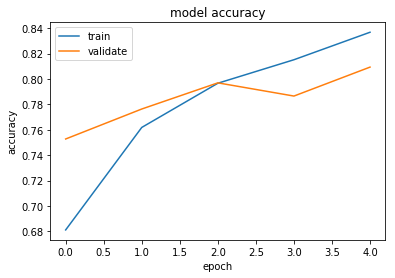

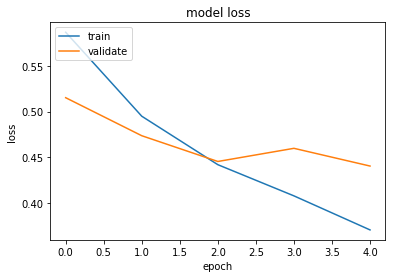

In [16]:
import matplotlib.pyplot as plt   
%matplotlib inline 
model.load_weights('saved_models/weights.best.from_new_scratch.hdf5')

# summarize history for accuracy
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

**Test the Model**

In [62]:
test_images = paths_to_tensor(test_images).astype('float32')/255


 13%|████▋                               | 1624/12500 [00:11<01:15, 143.19it/s]


 27%|█████████▋                          | 3363/12500 [00:22<01:02, 147.25it/s]


 40%|██████████████▌                     | 5061/12500 [00:34<00:50, 147.80it/s]


 54%|███████████████████▍                | 6729/12500 [00:45<00:39, 146.82it/s]


 67%|████████████████████████▏           | 8383/12500 [00:57<00:28, 146.38it/s]


 80%|████████████████████████████▊       | 9999/12500 [01:08<00:17, 145.05it/s]


 93%|████████████████████████████████▌  | 11628/12500 [01:20<00:06, 144.45it/s]


100%|███████████████████████████████████| 12500/12500 [01:27<00:00, 143.11it/s]

In [94]:
len(test_images)

12500

In [64]:
model.load_weights('saved_models/weights.best.from_new_scratch.hdf5')
# get the prediction in test set
predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_images]

In [83]:
len(predictions)

12500

In [82]:
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(test_images, axis=1))/len(predictions)

AxisError: axis 1 is out of bounds for array of dimension 1

In [68]:
train_targets.shape

(20000,)

**Format for Kaggle submission**

This image contains dog


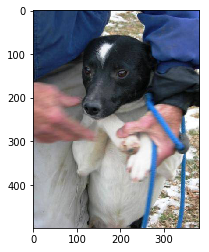

------------------------------------------------
This image contains cat


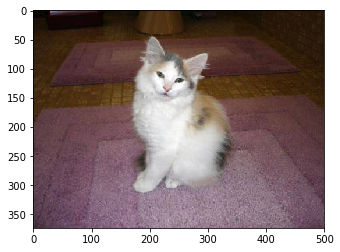

------------------------------------------------
This image contains dog


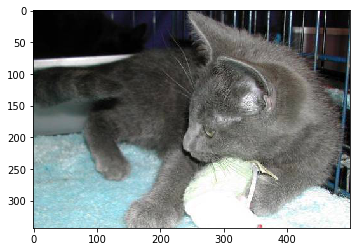

------------------------------------------------
This image contains dog


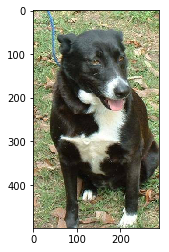

------------------------------------------------
This image contains dog


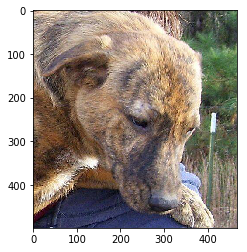

------------------------------------------------
This image contains cat


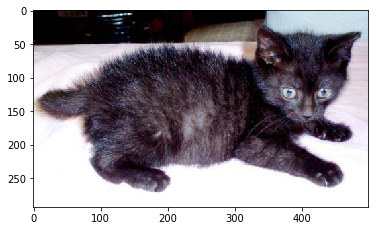

------------------------------------------------
This image contains cat


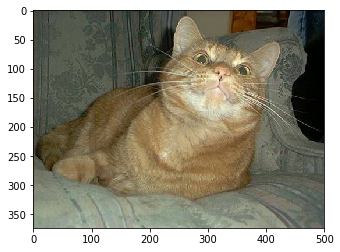

------------------------------------------------
This image contains dog


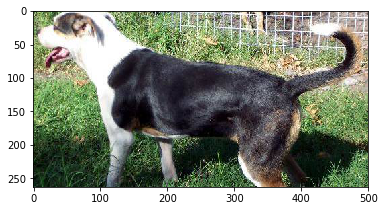

------------------------------------------------
This image contains dog


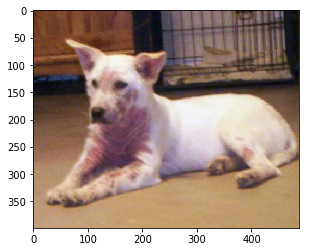

------------------------------------------------
This image contains cat


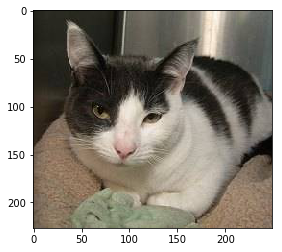

------------------------------------------------
This image contains cat


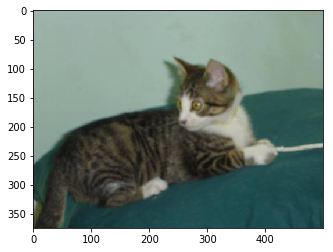

------------------------------------------------
This image contains cat


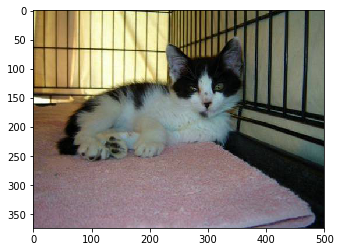

------------------------------------------------
This image contains cat


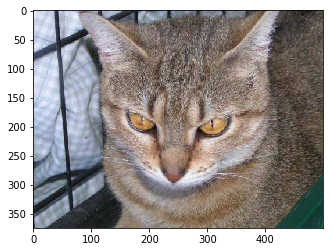

------------------------------------------------
This image contains cat


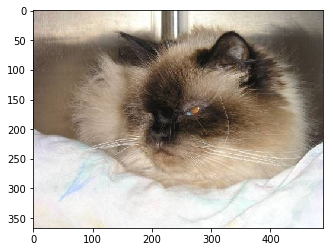

------------------------------------------------
This image contains cat


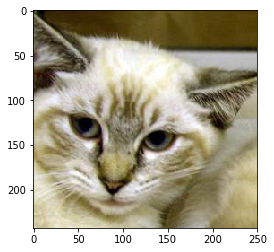

------------------------------------------------
This image contains dog


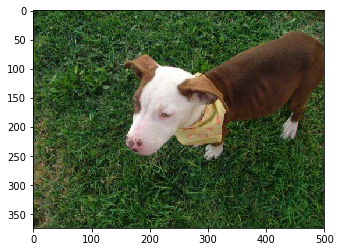

------------------------------------------------
This image contains dog


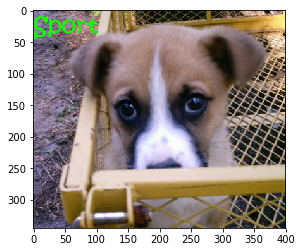

------------------------------------------------
This image contains cat


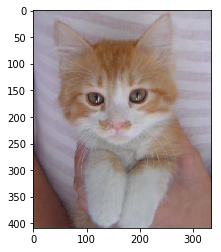

------------------------------------------------
This image contains dog


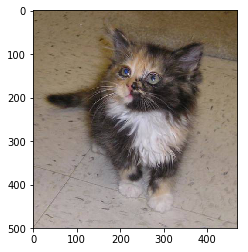

------------------------------------------------
This image contains cat


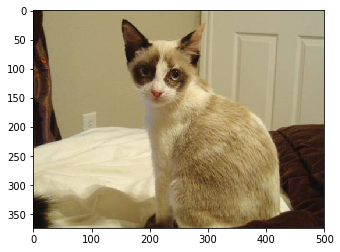

------------------------------------------------
This image contains dog


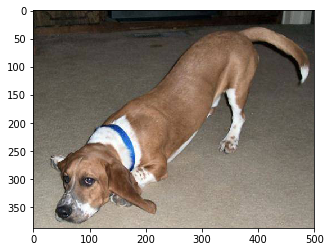

------------------------------------------------
This image contains dog


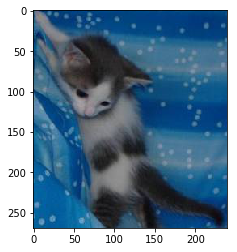

------------------------------------------------
This image contains cat


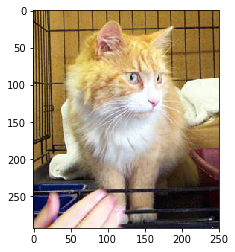

------------------------------------------------
This image contains cat


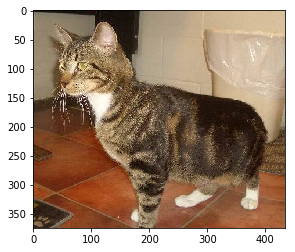

------------------------------------------------
This image contains cat


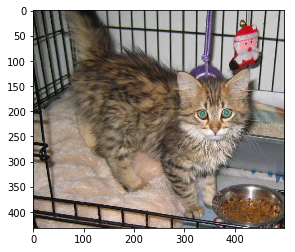

------------------------------------------------
This image contains dog


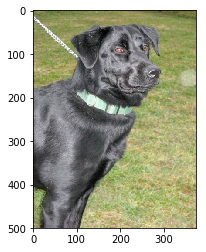

------------------------------------------------
This image contains cat


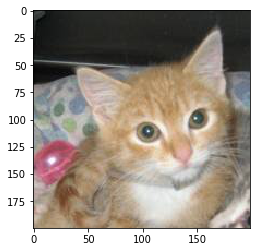

------------------------------------------------
This image contains cat


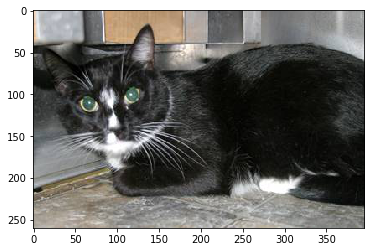

------------------------------------------------
This image contains dog


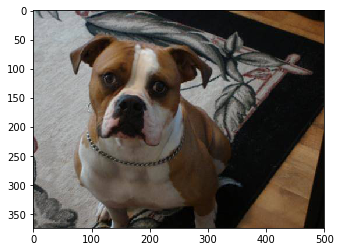

------------------------------------------------
This image contains dog


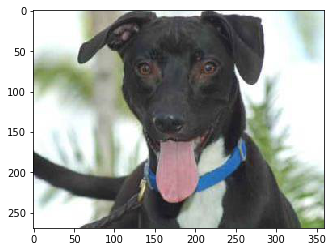

------------------------------------------------
This image contains dog


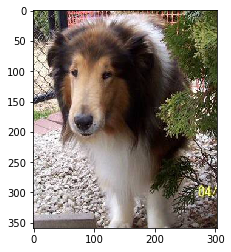

------------------------------------------------
This image contains dog


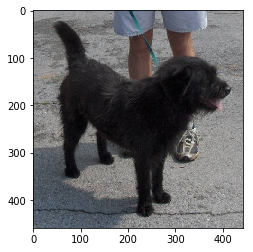

------------------------------------------------
This image contains dog


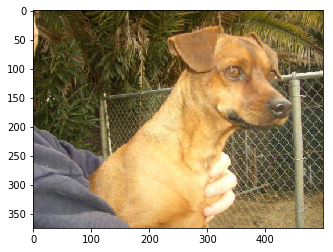

------------------------------------------------
This image contains dog


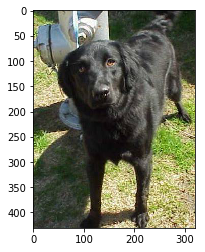

------------------------------------------------
This image contains cat


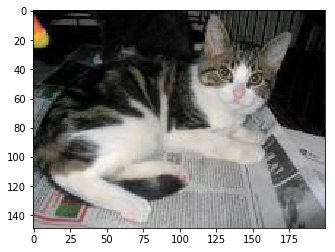

------------------------------------------------
This image contains dog


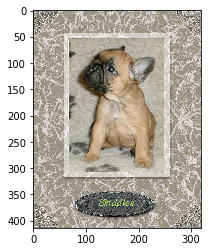

------------------------------------------------
This image contains dog


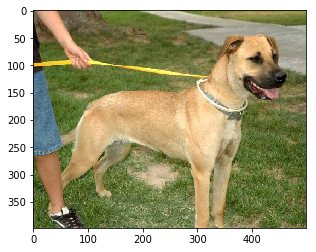

------------------------------------------------
This image contains dog


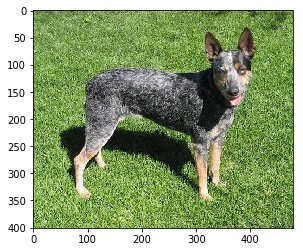

------------------------------------------------
This image contains dog


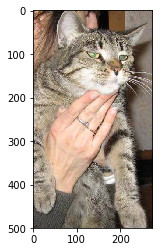

------------------------------------------------
This image contains cat


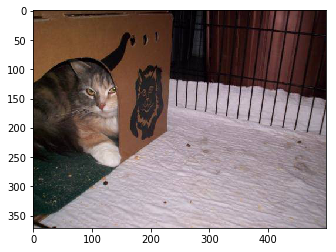

------------------------------------------------
This image contains cat


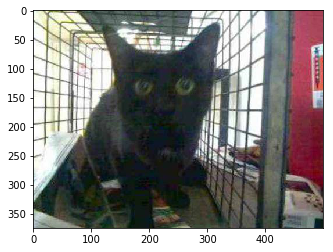

------------------------------------------------
This image contains dog


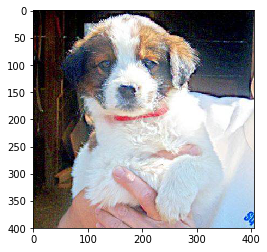

------------------------------------------------
This image contains dog


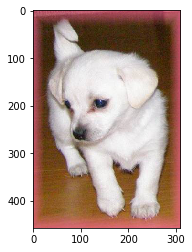

------------------------------------------------
This image contains dog


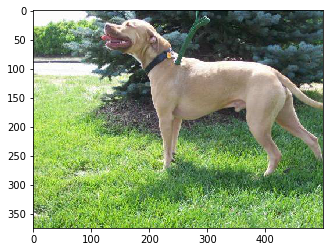

------------------------------------------------
This image contains dog


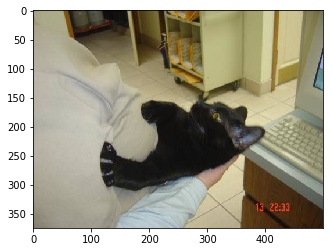

------------------------------------------------
This image contains dog


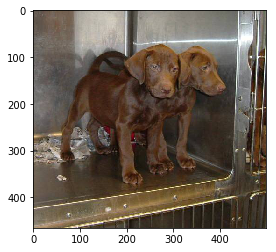

------------------------------------------------
This image contains dog


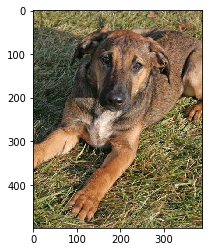

------------------------------------------------
This image contains dog


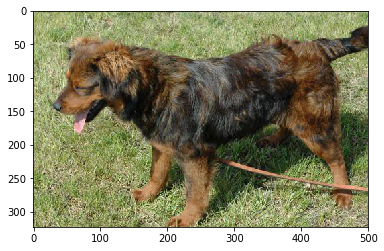

------------------------------------------------
This image contains dog


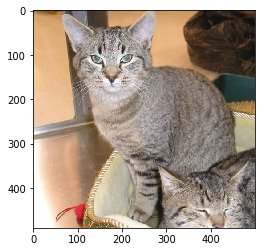

------------------------------------------------
This image contains dog


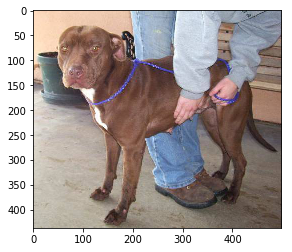

------------------------------------------------


In [57]:
# show an images
def show_image(img_path):
    img = cv2.imread(img_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

def cat_dog_prediction(test_images, predictions):
    # test human face is detected
    for i in range(len(predictions)): 
        if predictions[i] == 1:
            print("This image contains dog")
            show_image(test_images[i]) # display the image
        else:
            print("This image contains cat")
            show_image(test_images[i]) # display the image
        print("------------------------------------------------")

cat_dog_prediction(test_save[:50], predictions)

In [65]:
# 
with open("submission_model_1.csv","w") as f:
    f.write("id,label\n")
    for i in range(len(predictions)):
        f.write(str(i+1)+","+str(predictions[i])+"\n")
f.close()

In [30]:
len(test_save)

12500